# HW #6 

In [5]:
import nltk, re

def init_parser(grammar_str):
    """
    Initialize a feature parser based on the input grammar string.
    """
    grammar = nltk.grammar.FeatureGrammar.fromstring(grammar_str)
    return nltk.parse.FeatureIncrementalChartParser(grammar)

def word_tokenize(sent):
    # If you are receiving the "punkt" error, uncomment
    # the following line -- it's not as good a tokenizer
    # but it will function without nltk downloads:
    # return re.split('\s+', sent)
    return nltk.tokenize.word_tokenize(sent)

def init_sents(sent_str):
    """
    Parse in a series of sentences, and their acceptability notation
    as a tuple of (is_valid, sent).
    """
    for sent in [s.strip() for s in sent_str.split('\n') if s.strip()]:
        is_valid = not sent.startswith('*')
        tokens = nltk.tokenize.word_tokenize(re.sub('^\*?\s*', '', sent))
        yield is_valid, tokens

# A few IPython visualization tools
from IPython.core.display import display_html, display_png
def csscolor(s, c): return '<span style="color: {};">{}</span>'.format(c, s)
def html(s): display_html(s, raw=True)
    
def check_coverage(grammar_str, sent_str):
    """
    A helper function to iterate over our defined grammar and sentence key,
    and tell us whether or not we got the answer right for the given sentence.
    
    :type sent_list: list[str]
    """
    ret_str = ''
    parser = init_parser(grammar_str)
    for is_valid, tokens in init_sents(sent_str):
        valid_marker = '' if is_valid else '&#42; '
        sent_repr = '{}{}'.format(valid_marker, ' '.join(tokens))
        
        def sent_error(extra=''):
            html('\u274C &nbsp;' + csscolor(sent_repr + extra, 'red'))
        def sent_success(extra=''):
            html('\u2705 &nbsp;' + csscolor(sent_repr + extra, 'green'))
        try:
            parses = list(parser.parse(tokens))
        except ValueError as ve:
            html('\u274C ' + csscolor(str(ve), 'red'))
            continue
        
        if not parses:
            if is_valid:
                sent_error()
            else:
                sent_success()
        else:
            first_parse = ' {}'.format(parses[0])
            if is_valid:                   
                sent_success(str(parses[0]))
            else:
                sent_error(str(parses[0]))
            # Comment out the following line if you're receiving
            # a "tkinter" error:
            display_png(parses[0])
            
    display_html(ret_str, raw=True)

# Practice

Note that in the sentences below, *"**gifted**,"*  is a ditransitive verb that requires the indirect object to be animate (in my idiolect). 

*(with thanks to Shannon for suggesting it)* — *"**made**,"* on the other hand, does not have such a distinction and can have this requirement left unspecified.



✅   nobody eats a bagel(S[SEM=<-exists x.(person(x) & exists z4.(bagel(z4) & exists e.(eating(e) & eater(e,x) & eatenthing(e,z4))))>]
 (NP[NUM='sg', SEM=<\Q.-exists x.(person(x) & Q(x))>]
 (PropN[NUM='sg', SEM=<\Q.-exists x.(person(x) & Q(x))>] nobody))
 (VP[NUM='sg', SEM=<\y.exists x.(bagel(x) & exists e.(eating(e) & eater(e,y) & eatenthing(e,x)))>]
 (TV[NUM='sg', SEM=<\X y.X(\x.exists e.(eating(e) & eater(e,y) & eatenthing(e,x)))>, TNS='pres']
 eats)
 (NP[NUM='sg', SEM=<\Q.exists x.(bagel(x) & Q(x))>]
 (Det[NUM='sg', SEM=<\P Q.exists x.(P(x) & Q(x))>] a)
 (Nom[NUM='sg', SEM=<\x.bagel(x)>]
 (N[NUM='sg', SEM=<\x.bagel(x)>] bagel)))))

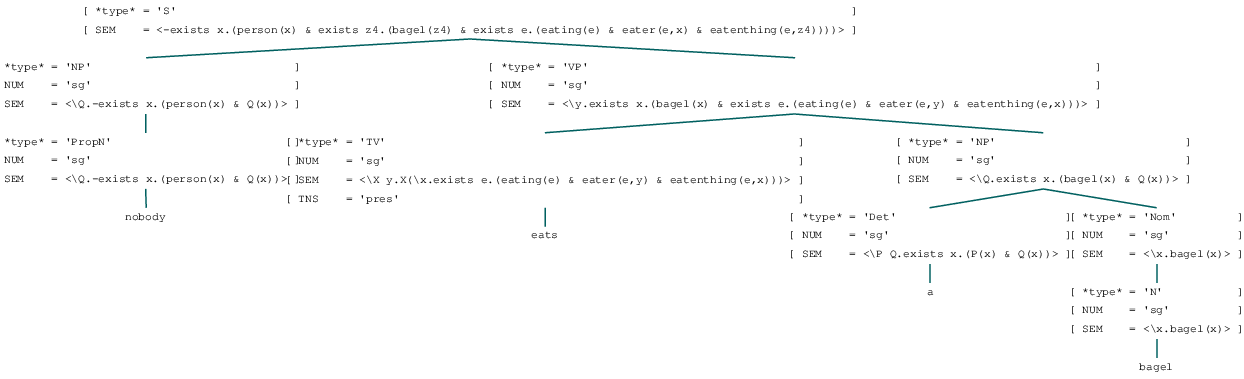

In [14]:
sentences = '''
nobody eats a bagel
'''

grammar='''

% start S
############################
# Grammar Rules
############################

S[SEM = <?subj(?vp)>] -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp]

NP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  Nom[NUM=?n,SEM=?nom]
NP[NUM=?n,SEM=?np] -> PropN[NUM=?n,SEM=?np]
NP[NUM=?n,SEM=<?conj(?np1,?np2)>] -> PropN[NUM=?n,SEM=?np1] CONJ[SEM=?conj] PropN[NUM=?n,SEM=?np2]

Nom[NUM=?n,SEM=?nom] -> N[NUM=?n,SEM=?nom]
Nom[NUM=?n,SEM=<?conj(?nom1,?nom2)>] -> N[NUM=?n,SEM=?nom1] CONJ[SEM=?conj] N[NUM=?n,SEM=?nom2]

VP[NUM=?n,SEM=?v] -> IV[NUM=?n,SEM=?v]
VP[NUM=?n,SEM=<?v(?obj)>] -> TV[NUM=?n,SEM=?v] NP[SEM=?obj]
VP[NUM=?n,SEM=<?conj(?v1,?v2)>] -> IV[NUM=?n,SEM=?v1] CONJ[SEM=?conj] IV[NUM=?n,SEM=?v2]
VP[NUM=?n,SEM=<?conj(?v1(?obj1),?v2(?obj2))>] -> TV[NUM=?n,SEM=?v1] NP[SEM=?obj1] CONJ[SEM=?conj] TV[NUM=?n,SEM=?v2] NP[SEM=?obj2]
VP[NUM=?n,SEM=<?conj(?v1(?obj1),?v2)>] -> TV[NUM=?n,SEM=?v1] NP[SEM=?obj1] CONJ[SEM=?conj] IV[NUM=?n,SEM=?v2]

## Do auxiliaries
VP[+neg,NUM=?n,SEM=<app(?v,?vp)>] -> AuxP[NUM=?n,SEM=?v] VP[NUM=pl,SEM=?vp]
AuxP[NUM=?n,SEM=<app(?neg,?aux)>] -> Aux[NUM=?n,SEM=?aux] Neg[SEM=?neg]

VP[NUM=?n,SEM=?v] -> IV[NUM=?n,SEM=?v] PP

PP[SEM=<app(?p,?np)>] -> P[SEM=?p] NP[SEM=?np]

############################
# Lexical Rules
############################

PropN[NUM=sg,SEM=<\\P.P(John)>] -> 'John'
PropN[NUM=sg,SEM=<\\P.P(Mary)>] -> 'Mary'
PropN[NUM=sg,SEM=<\\P.P(Jack)>] -> 'Jack'
PropN[NUM=sg,SEM=<\\Q. (- exists x.(person(x) & Q(x)))>] -> 'nobody'

Det[NUM=sg,SEM=<\\P Q.all x.(P(x) -> Q(x))>] -> 'every'
Det[NUM=pl,SEM=<\\P Q.all x.(P(x) -> Q(x))>] -> 'all'
Det[NUM=sg,SEM=<\\P Q.exists x.(P(x) & Q(x))>] -> 'a'
Det[NUM=sg,SEM=<\\P Q.exists x.(P(x) & Q(x))>] -> 'an'
Det[NUM=sg,SEM=<\\P Q.(- exists x.(P(x) & Q(x)))>] -> 'no'

N[NUM=sg,SEM=<\\x.student(x)>] -> 'student'
N[NUM=pl,SEM=<\\x.student(x)>] -> 'students'
N[NUM=sg,SEM=<\\x.sandwich(x)>] -> 'sandwich'
N[NUM=sg,SEM=<\\x.soda(x)>] -> 'soda'
N[NUM=sg,SEM=<\\x.essay(x)>] -> 'essay'
N[NUM=sg,SEM=<\\x.bagel(x)>] -> 'bagel'
N[NUM=sg,SEM=<\\x.person(x)>] -> 'person'

CONJ[SEM=<\\X Y.(\\S. (X(S) | Y(S)))>] -> 'or'

Aux[NUM=sg,SEM=<\\P x.P(x)>,tns=pres] -> 'does'

Neg[SEM=<\\T P.T(\\x.(- P(x)))>] -> 'not'

IV[SEM=<\\x.exists e.(barking(e) & barker(e,x))>] -> 'barks'
IV[NUM=sg,SEM=<\\x.exists e.(eating(e) & eater(e,x))>,TNS=pres] -> 'eats'
IV[NUM=pl,SEM=<\\x.exists e.(eating(e) & eater(e,x))>,TNS=pres] -> 'eat'
IV[NUM=pl,SEM=<\\x.exists e.(drinking(e) & drinker(e,x))>,TNS=pres] -> 'drink'

TV[NUM=sg,SEM=<\\X y.X(\\x.exists e.(eating(e) & eater(e,y) & eatenthing(e,x)))>,TNS=pres] -> 'eats'
TV[NUM=sg,SEM=<\\X y.X(\\x.exists e.(drinking(e) & drinker(e,y) & drinkthing(e,x)))>,TNS=pres] -> 'drinks'
TV[NUM=sg,SEM=<\\X y.X(\\x.exists e.(writing(e) & writer(e,y) & writtenthing(e,x)))>,TNS=pres] -> 'writes'
'''

check_coverage(grammar, sentences)